# Analysis & Visualization of Airbnb Reservations - San Francisco

### Loading python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data=pd.read_csv("listings.csv")

In [3]:
#printing first 5 rows of data
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20220907064650,2022-09-07,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.77,City Registration Pending,f,1,1,0,0,2.24
1,5858,https://www.airbnb.com/rooms/5858,20220907064650,2022-09-07,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.68
2,8014,https://www.airbnb.com/rooms/8014,20220907064650,2022-09-07,previous scrape,room in FEMALE house WIFI market nearby,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.94,4.59,4.67,STR-0000974,f,3,0,3,0,0.70
3,148627,https://www.airbnb.com/rooms/148627,20220907064650,2022-09-07,city scrape,Romantic Marina Garden Studio,"Street parking only, please follow all signs.<...",Super convenient walking access to all the bes...,https://a0.muscache.com/pictures/3048720/ef73f...,709325,...,4.46,4.63,4.32,NaN,f,5,5,0,0,0.88
4,494111,https://www.airbnb.com/rooms/494111,20220907064650,2022-09-07,city scrape,Comfortable space of your own in SF,"<b>The space</b><br />A beautiful, bright, and...",The location is not considered a traditionally...,https://a0.muscache.com/pictures/a4c0e7ec-caa1...,252927,...,4.93,4.66,4.63,STR-0005156,f,2,2,0,0,1.72


In [4]:
print("rows and columns in the dataset:",data.shape)

rows and columns in the dataset: (6629, 75)


### checking the data type of variables in the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6629 non-null   int64  
 1   listing_url                                   6629 non-null   object 
 2   scrape_id                                     6629 non-null   int64  
 3   last_scraped                                  6629 non-null   object 
 4   source                                        6629 non-null   object 
 5   name                                          6629 non-null   object 
 6   description                                   6577 non-null   object 
 7   neighborhood_overview                         4700 non-null   object 
 8   picture_url                                   6629 non-null   object 
 9   host_id                                       6629 non-null   i

### summary statistics of the dataset

In [6]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.629000e+03,6.629000e+03,6.629000e+03,6617.000000,6617.000000,0.0,6629.000000,6629.000000,6629.000000,0.0,...,5500.000000,5499.000000,5500.000000,5499.000000,5499.000000,6629.000000,6629.000000,6629.000000,6629.000000,5522.000000
mean,8.184755e+16,2.022091e+13,9.743174e+07,113.191628,131.471664,NaN,37.765551,-122.431502,3.205159,NaN,...,4.769955,4.879565,4.855145,4.787710,4.666388,13.801629,9.724544,3.664052,0.236386,1.443233
std,2.128672e+17,1.968899e+00,1.255787e+08,588.709624,642.200471,NaN,0.025917,0.027790,2.019331,NaN,...,0.398471,0.312667,0.360003,0.382999,0.419939,31.573587,30.830858,9.459382,2.219155,2.097297
min,9.580000e+02,2.022091e+13,1.169000e+03,1.000000,1.000000,NaN,37.691660,-122.512460,0.000000,NaN,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.607935e+07,2.022091e+13,5.805679e+06,1.000000,2.000000,NaN,37.749760,-122.445400,2.000000,NaN,...,4.710000,4.880000,4.870000,4.750000,4.590000,1.000000,0.000000,0.000000,0.000000,0.220000
50%,3.353766e+07,2.022091e+13,3.638158e+07,3.000000,4.000000,NaN,37.770270,-122.424250,2.000000,NaN,...,4.910000,4.970000,4.970000,4.900000,4.760000,2.000000,1.000000,0.000000,0.000000,0.650000
75%,4.927627e+07,2.022091e+13,1.484273e+08,12.000000,20.000000,NaN,37.787010,-122.410780,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.890000,8.000000,2.000000,2.000000,0.000000,1.960000
max,7.084312e+17,2.022091e+13,4.773357e+08,4019.000000,4334.000000,NaN,37.809540,-122.358484,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,154.000000,153.000000,54.000000,26.000000,40.670000


### Data Cleaning

#### checking the null values in the data

In [7]:
data.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1107
Length: 75, dtype: int64

In [8]:
#filling the null values in the reviews_per_month column
data.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
data.reviews_per_month.isnull().sum()

0

In [9]:
#checking the null values in the data
data.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

#### checking for duplicate values in the data

In [10]:
data.duplicated().sum()

0

There are no duplicate values or null values in the data. Now, we can proceed removing unneccessary columns and making visualization with the data

#### Columns in the dataframe

In [11]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

#### checking the unique values in different columns to get some understanding on the columns and decide which column we can remove

In [12]:
data['scrape_id'].unique()

array([20220907064650])

there is no extra information from scrape_id column

In [13]:
data['last_scraped'].unique() 

array(['2022-09-07'], dtype=object)

there is no extra information from last_scraped column

In [14]:
data['instant_bookable'].unique()

array(['f', 't'], dtype=object)

we can use instant_bookable column

#### Let's drop columns that are not required for analysis and visualizations

In [15]:
data.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name','neighborhood_overview', 'picture_url',
       'host_url', 'host_about','host_thumbnail_url', 'host_picture_url',
       'host_has_profile_pic','neighbourhood_group_cleansed', 'bathrooms',
       'calendar_updated','calendar_last_scraped', 'license'], axis=1, inplace=True)

In [16]:
data.head()

,id,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,Please check local laws re Covid before you re...,1169,Holly,2008-07-31,"San Francisco, CA",within an hour,90%,98%,t,...,4.95,4.88,4.98,4.77,f,1,1,0,0,2.24
1,5858,We live in a large Victorian house on a quiet ...,8904,Philip And Tania,2009-03-02,"San Francisco, CA",within a day,60%,70%,f,...,4.89,4.85,4.77,4.68,f,1,1,0,0,0.68
2,8014,Room is on the second floor so it gets a good ...,22402,Jia,2009-06-20,"San Francisco, CA",within an hour,100%,90%,f,...,4.91,4.94,4.59,4.67,f,3,0,3,0,0.70
3,148627,"Street parking only, please follow all signs.<...",709325,Mark,2011-06-16,"San Francisco, CA",within an hour,100%,100%,f,...,4.73,4.46,4.63,4.32,f,5,5,0,0,0.88
4,494111,"<b>The space</b><br />A beautiful, bright, and...",252927,Vivian,2010-10-04,"San Francisco, CA",within a day,100%,87%,t,...,4.92,4.93,4.66,4.63,f,2,2,0,0,1.72


### Pre processing

In [17]:
data.instant_bookable.unique()

array(['f', 't'], dtype=object)

In [18]:
data.instant_bookable = data.instant_bookable.replace(['t', 'f'], ["true", "false"])

In [19]:
data.instant_bookable.unique()

array(['false', 'true'], dtype=object)

In [20]:
data.host_is_superhost = data.host_is_superhost.replace(['t', 'f'], ["true", "false"])

In [21]:
data.host_is_superhost.unique()

array(['true', 'false', nan], dtype=object)

#### Since when are the hosts in collaboration with Airbnb

Added two new columns "host_since_year" & "host_since_month" for understanding since when the hosts in collaboration with Airbnb

In [22]:
data['host_since_year'] = pd.DatetimeIndex(data['host_since']).year
data['host_since_month'] = pd.DatetimeIndex(data['host_since']).month

In [23]:
data['first_review_year'] = pd.DatetimeIndex(data['first_review']).year
data['first_review_month'] = pd.DatetimeIndex(data['first_review']).month

In [24]:
data.price = data.price.str.replace(',', '')
data.price = data.price.str.replace('$', '')
data.price = data.price.astype(float)
data.price.head()

0    180.0
1    235.0
2     61.0
3     85.0
4    146.0
Name: price, dtype: float64

In [25]:
data['host_listings_count'] = data['host_listings_count'].fillna(0)

In [26]:
data.host_response_rate = data.host_response_rate.str.replace('%', '')
data.host_response_rate = data.host_response_rate.fillna(0)
data['host_response_rate']=data['host_response_rate'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6629 non-null   int64  
 1   description                                   6577 non-null   object 
 2   host_id                                       6629 non-null   int64  
 3   host_name                                     6617 non-null   object 
 4   host_since                                    6617 non-null   object 
 5   host_location                                 5571 non-null   object 
 6   host_response_time                            5731 non-null   object 
 7   host_response_rate                            6629 non-null   int64  
 8   host_acceptance_rate                          5950 non-null   object 
 9   host_is_superhost                             6622 non-null   o

### Data Visualization

#### Visualizing count of new hosts and year of collaborating with Airbnb

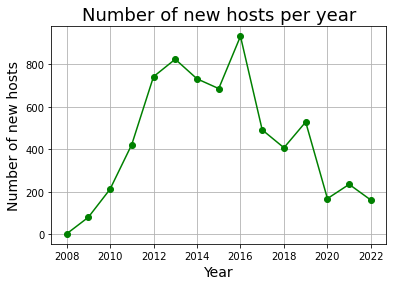

In [28]:
hostsince_year = data.host_since_year.value_counts()
df_year = pd.DataFrame(hostsince_year)
df_year = df_year.sort_index()
plt.plot(df_year.index, df_year.host_since_year, color='green', marker='o')
plt.title('Number of new hosts per year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of new hosts', fontsize=14)
plt.grid(True)
plt.show()

#### Visualizing count of new hosts and month of collaborating with Airbnb

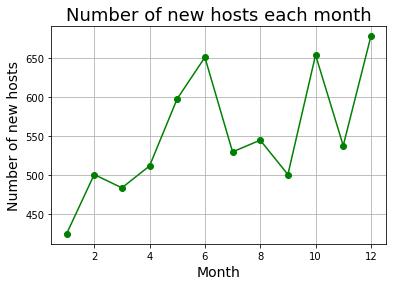

In [29]:
hostsince_month = data.host_since_month.value_counts()
df_month = pd.DataFrame(hostsince_month)
df_month = df_month.sort_index()
plt.plot(df_month.index, df_month.host_since_month, color='green', marker='o')
plt.title('Number of new hosts each month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of new hosts', fontsize=14)
plt.grid(True)
plt.show()

### Price vs Room type

In [53]:
df_dict = {'room_type': [],
           'Average daily price': []
}
df_room_price = pd.DataFrame(df_dict)
for i in data.room_type.unique():
    df_room_price.loc[len(df_room_price.index)] = [i, np.median(data[data.room_type == i].price)] 

df_room_price

,room_type,Average daily price
0,Entire home/apt,195.0
1,Private room,109.0
2,Shared room,58.0
3,Hotel room,191.0


### Failed Experiment 1

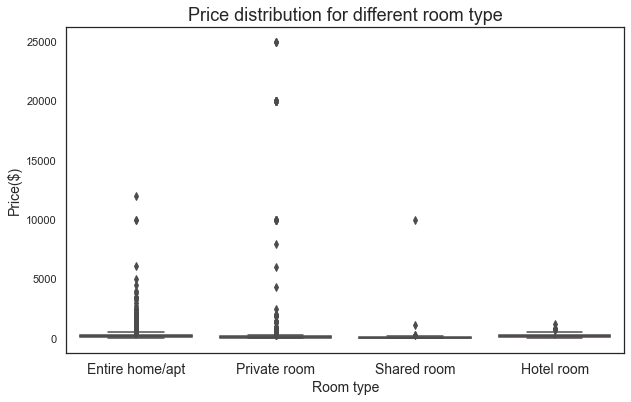

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='room_type',y='price')
plt.xticks(rotation=0,fontsize=14)
plt.title('Price distribution for different room type', fontsize=18)
plt.xlabel('Room type', fontsize=14)
plt.ylabel('Price($)', fontsize=14)
plt.show()

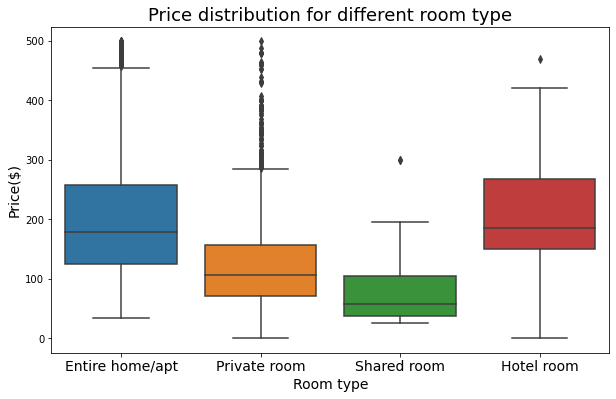

In [31]:
filtered_price=data[(data.price < 500)]
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_price, x='room_type',y='price')
plt.xticks(rotation=0,fontsize=14)
plt.title('Price distribution for different room type', fontsize=18)
plt.xlabel('Room type', fontsize=14)
plt.ylabel('Price($)', fontsize=14)
plt.show()

### Median Daily Price vs Guests

In [34]:
df_dict = {'accommodates_count': [],
    'Median daily price': []
}
df_accommodates_price = pd.DataFrame(df_dict)
for i in range(1,10,2):
    st=str(i)+'-'+str(i+1)+' Guests'
    icount=np.median(data[data['accommodates'] == i].price)
    inextcount=np.median(data[data['accommodates'] == i+1].price)
    df_accommodates_price.loc[len(df_accommodates_price.index)] = [st,np.average(int(icount+inextcount))] 
df_accommodates_price.loc[len(df_accommodates_price.index)] = ['11+ Guests', int(np.median(data[data['accommodates']>=11].price))]

df_accommodates_price

,accommodates_count,Median daily price
0,1-2 Guests,202.0
1,3-4 Guests,358.0
2,5-6 Guests,566.0
3,7-8 Guests,759.0
4,9-10 Guests,839.0
5,11+ Guests,510.0


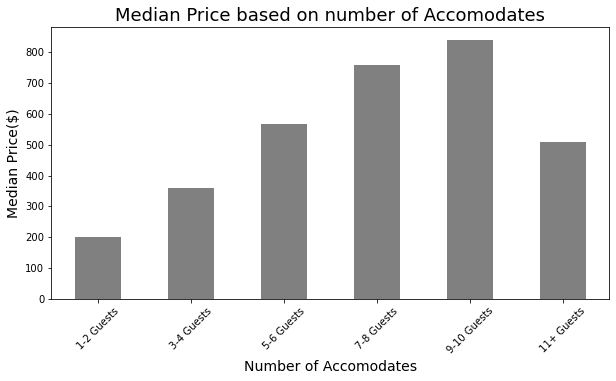

In [35]:
df_accommodates_price.plot(x = 'accommodates_count', y='Median daily price',figsize=(10,5), grid = False, legend = False,color='grey', kind='bar')
plt.title("Median Price based on number of Accomodates", fontsize = 18)
plt.xticks(rotation=45)
plt.ylabel("Median Price($)", fontsize=14)
plt.xlabel("Number of Accomodates", fontsize=14)
plt.show()

### Room type vs instant bookable

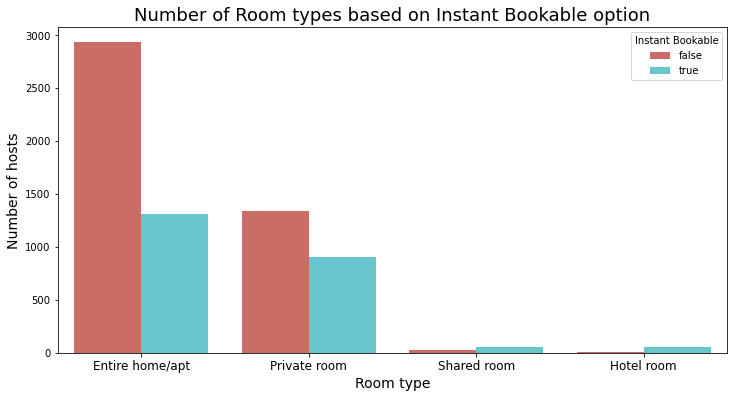

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data['room_type'], hue=data['instant_bookable'],palette='hls')
plt.xticks(rotation=0,fontsize=12)
plt.title('Number of Room types based on Instant Bookable option',fontsize=18)
plt.xlabel('Room type', fontsize=14)
plt.ylabel('Number of hosts', fontsize=14)
plt.legend(title="Instant Bookable")
plt.show()

### Instant_bookable vs latitude & longitude

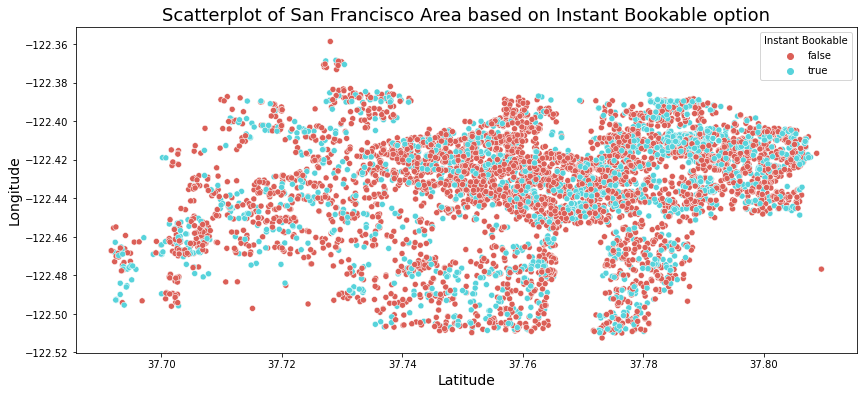

In [37]:
#checking instant bookable option on a scatterplot of San Francisco 
plt.figure(figsize=(14,6))
sns.scatterplot(data.latitude,data.longitude,hue=data.instant_bookable,palette='hls')
plt.title('Scatterplot of San Francisco Area based on Instant Bookable option',fontsize=18)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.legend(title="Instant Bookable")
plt.show()

#### Range of Reviews vs number of hosts

In [38]:
df_dict_reviews = {'range_of_reviews': [],
           'total_number_of_hosts': []
}
df_number_reviews = pd.DataFrame(df_dict_reviews)
df_number_reviews.loc[len(df_number_reviews.index)] = ['Zero Reviews', len(data[data['number_of_reviews']==0])]
for i in range(1,50,10):
    df_number_reviews.loc[len(df_number_reviews.index)] = [str(i)+'-'+str(i+9)+' Reviews', len(data.loc[(data["number_of_reviews"] >= i) & (data["number_of_reviews"] <= i+9)])]
df_number_reviews.loc[len(df_number_reviews.index)] = ['50+ Reviews', len(data[data['number_of_reviews']>=50])] 
df_number_reviews

,range_of_reviews,total_number_of_hosts
0,Zero Reviews,1107.0
1,1-10 Reviews,2318.0
2,11-20 Reviews,608.0
3,21-30 Reviews,396.0
4,31-40 Reviews,263.0
5,41-50 Reviews,207.0
6,50+ Reviews,1747.0


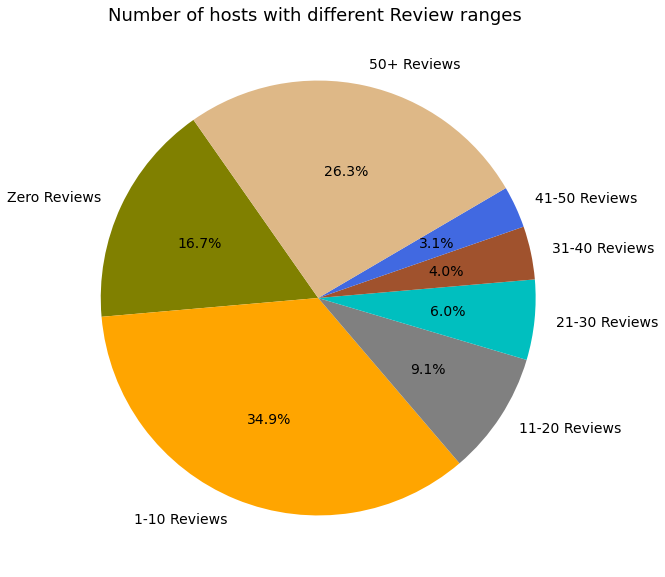

In [39]:
plt.figure(figsize=(10,10))
colors=('olive', 'orange', 'grey', 'c', 'sienna', 'royalblue', 'burlywood')
plt.pie(df_number_reviews['total_number_of_hosts'],
        startangle=125,autopct='%1.1f%%',
        labels = df_number_reviews['range_of_reviews'],
        textprops={'fontsize': 14},colors=colors)
plt.title('Number of hosts with different Review ranges ',fontsize=18)
plt.show()

### Host_listings_count

In [40]:
df_dict = {'host_listing_count': [],
    'Number of hosts': []
}
df_new = pd.DataFrame(df_dict)
for i in range(1,10,1):
    df_new.loc[len(df_new.index)] = [i, len(data[data['host_listings_count']==i])]
df_new.loc[len(df_new.index)] = ['10+', len(data[data['host_listings_count']>=10])] 

df_new

,host_listing_count,Number of hosts
0,1.0,2233.0
1,2.0,955.0
2,3.0,529.0
3,4.0,342.0
4,5.0,203.0
5,6.0,169.0
6,7.0,127.0
7,8.0,74.0
8,9.0,147.0
9,10+,1838.0


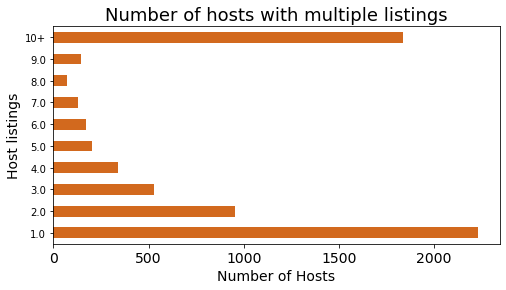

In [41]:
df_new.plot(x = 'host_listing_count', y='Number of hosts',figsize=(8,4), grid = False, legend = False, kind='barh', color='chocolate')
plt.title("Number of hosts with multiple listings",fontsize=18)
plt.xticks(rotation=0,fontsize=14)
plt.ylabel("Host listings",fontsize=14)
plt.xlabel("Number of Hosts", fontsize=14)
plt.show()

### Top 10 hosts visualizing using Treemap

In [42]:
data.calculated_host_listings_count.unique()

array([  1,   3,   5,   2,  12,   7,   9,  31,   4,   6,  29,  21,  16,
        49,  15,  22,  19,  13,  25,   8,  23,  37, 154,  26,  63,  10,
        24,  35,  20,  43,  30,  61,  38, 141,  11,  17,  14,  55,  18,
        36])

In [43]:
data.calculated_host_listings_count.max()

154

In [44]:
top_hostname=data[['host_id', 'host_name', 'host_is_superhost']].value_counts().head(10)
top_hostname_df = pd.DataFrame(top_hostname)
top_hostname_df

,,,0
host_id,host_name,host_is_superhost,
4430421,Landmark,false,154
107434423,Blueground,false,141
70722023,Michael,true,63
173206762,Stratford,false,61
267895362,Rocky,false,55
17042045,The Bartlett,false,49
117141107,Zarinah,false,43
64646820,Michelle,true,38
52178915,Jim,true,37


In [45]:
top_host_name=data[['host_id', 'host_name']].value_counts().head(10)
top_host_name_df = pd.DataFrame(top_host_name)
top_host_name_df

,,0
host_id,host_name,
4430421,Landmark,154
107434423,Blueground,141
70722023,Michael,63
173206762,Stratford,61
267895362,Rocky,55
17042045,The Bartlett,49
117141107,Zarinah,43
64646820,Michelle,38
52178915,Jim,37


In [46]:
np.array(top_host_name)

array([154, 141,  63,  61,  55,  49,  43,  38,  37,  36])

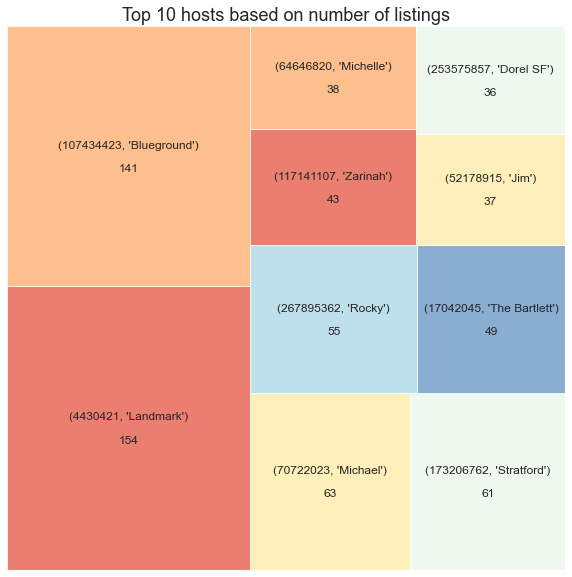

In [47]:
plt.figure(figsize=(10, 10))
sns.set_style(style="whitegrid") # set seaborn plot style
sizes=np.array(top_host_name) # proportions of the categories
label = [f'{name}\n\n{count}' for name, count in zip(top_host_name.index, top_host_name)]
squarify.plot(sizes=sizes, label = label, alpha=0.7, text_kwargs={'fontsize': 12},color=sns.color_palette("RdYlBu")).set_title('Top 10 hosts based on number of listings',fontsize=18)
plt.axis('off')
plt.show()

### Superhost requirements

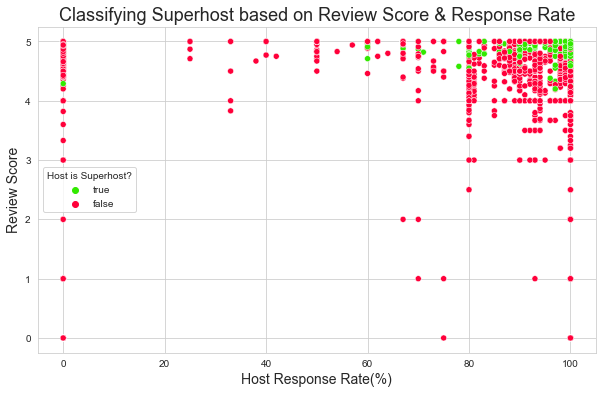

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.host_response_rate,data.review_scores_rating,hue=data.host_is_superhost,palette='prism')
plt.title('Classifying Superhost based on Review Score & Response Rate',fontsize=18)
plt.xlabel('Host Response Rate(%)', fontsize=14)
plt.ylabel('Review Score', fontsize=14)
plt.legend(title="Host is Superhost?")
plt.grid(True)
plt.show()

### Failed Experiment: We are unable to identify any pattern to say Host are Super Hosts

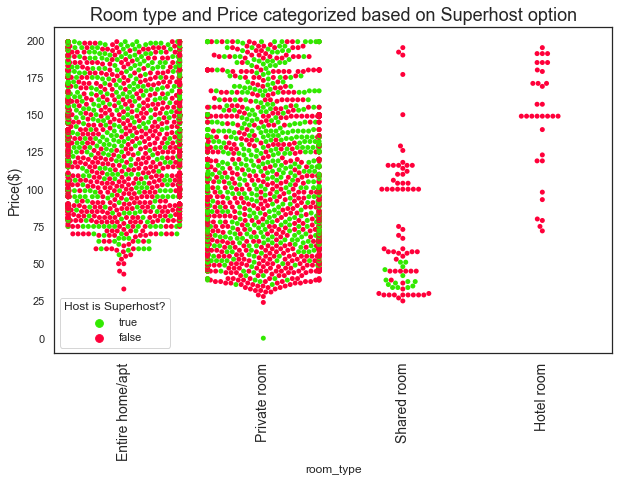

In [66]:
plt.figure(figsize=(10,6))
filtered_price_accommodates=data[(data.price < 200) ]
sns.swarmplot(data=filtered_price_accommodates, x='room_type',y='price',palette='prism',hue='host_is_superhost')
plt.xticks(rotation=90,fontsize=14)
plt.ylabel('Price($)', fontsize=14)
plt.title('Room type and Price categorized based on Superhost option',fontsize=18)
plt.legend(loc='lower right')
plt.legend(title="Host is Superhost?")
plt.show()

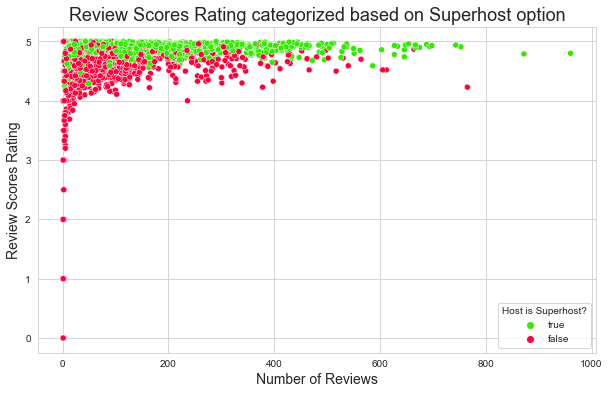

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.number_of_reviews,data.review_scores_rating,hue=data.host_is_superhost,palette='prism')
plt.title('Review Scores Rating categorized based on Superhost option',fontsize=18)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Review Scores Rating', fontsize=14)
plt.legend(title="Host is Superhost?")
plt.show()

### Superhost vs Instant bookable

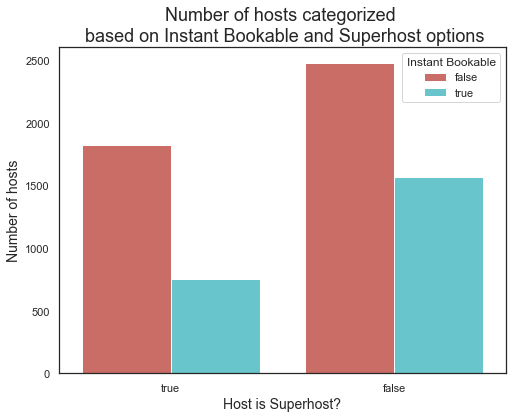

In [50]:
plt.figure(figsize=(8,6))
sns.set_theme(style = 'white')
sns.countplot(data=data, x="host_is_superhost", hue="instant_bookable" ,palette='hls')
plt.title('Number of hosts categorized \n based on Instant Bookable and Superhost options',fontsize=18)
plt.xlabel('Host is Superhost?', fontsize=14)
plt.ylabel('Number of hosts', fontsize=14)
plt.legend(title="Instant Bookable")
plt.show()

### Insights and Results:

- Since Covid-19, we could notice a smaller number of new hosts collaborating with Airbnb.
- Trend shows that holiday seasons have more new hosts.
- Private/Shared Rooms has low price in comparison with Entire Apt/Hotel room.
- Shared and Hotel rooms has more properties with Instant Booking.
- More than 50% of the listings has less than 10 reviews.
- To become a Super host, host should have more than 90% response rate and 4.8+ review rating.